In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob
import matplotlib.cm as cm
import matplotlib as mpl


import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap


from netCDF4 import Dataset
from scipy import stats

from matplotlib.animation import FuncAnimation

import geopandas as gpd
import geocube
from geocube.api.core import make_geocube
## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/post_processing/'

### load data

In [2]:
with xarray.open_dataset(path+'Amazon961x801/energy.November.ensmean.tmean.ctrl.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
with xarray.open_dataset(path+'Amazon961x801/energy.November.ensmean.tmean.ILgrassland.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
lats=ds1['XLAT'][0,:,0]
lons=ds1['XLONG'][0,0,:]
lu1=ds1['LU_INDEX'][0,:,:]
lu0=ds0['LU_INDEX'][0,:,:]

### Highlight the change in land use and use bright color for it
dif_lu = lu1 - lu0
lu1 = lu1.where(dif_lu==0,0)   ## assign the deforestated area (LU changed from 2 to 10) within ILs to be zero for plotting

### Note that in deforestation experiments, I changed everywhere within ILands to be zero, whereas there is a tiny amount of land
### covered by shrubs (LU=7), svannas (LU=9), or croplands (LU=10). And the majority are forests (LU=2). 
### Don't show them as deforestation in the plotting. 

ok
ok


### Land use map

Text(1.5, 0.3, 'Deforested regions')

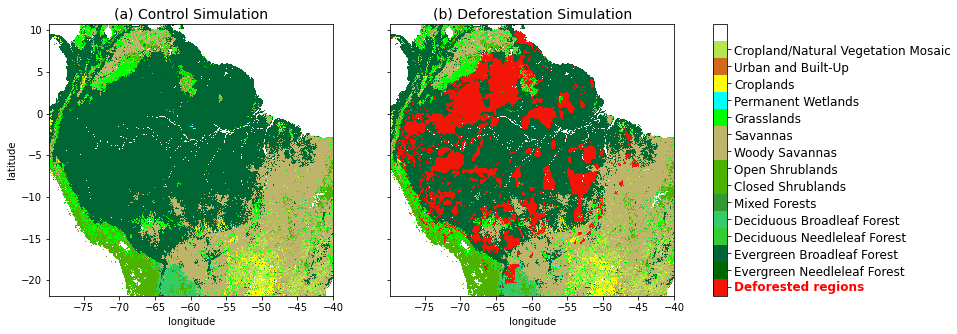

In [4]:
labels = ['Change in Land use within Indigenous Lands',
        'Evergreen Needleleaf Forest',
          'Evergreen Broadleaf Forest',
          'Deciduous Needleleaf Forest',
          'Deciduous Broadleaf Forest',
          'Mixed Forests',
          'Closed Shrublands',
          'Open Shrublands',
          'Woody Savannas',
          'Savannas',
          'Grasslands',
          'Permanent Wetlands',
          'Croplands',
          'Urban and Built-Up',
          'Cropland/Natural Vegetation Mosaic',
          'Snow and Ice',
          'Barren or Sparsely Vegetated',
          'Water',
          'Wooded Tundra',
          'Mixed Tundra',
          'Barren Tundra']
         # 'Lake']    
C = np.array([
    [.96,.08,.03], # 0 Changes in LUindex
    [0,.4,0],      #  1 Evergreen Needleleaf Forest
    [0,.4,.2],      #! 2 Evergreen Broadleaf Forest    
    [.2,.8,.2],     #  3 Deciduous Needleleaf Forest
    [.2,.8,.4],     #  4 Deciduous Broadleaf Forest
    [.2,.6,.2],     #  5 Mixed Forests
    [.3,.7,0],      #  6 Closed Shrublands
    [.3,.7,0],      #[.82,.41,.12],     #  7 Open Shurblands
    [.74,.71,.41],       #  8 Woody Savannas
    [.74,.71,.41], #[1,.84,.0],     #  9 Savannas
    [0,1,0],        #  10 Grasslands
    [0,1,1],        #! 11 Permanant Wetlands
    [1,1,0],      #  12 Croplands
    [.82,.41,.12],  #[1,0,0],     #  13 Urban and Built-up
    [.7,.9,.3],      #! 14 Cropland/Natual Vegation Mosaic
    [1,1,1]]) #,        #! 15 Snow and Ice
   # [.914,.914,.7], #  16 Barren or Sparsely Vegetated
   # [1,1,1],  #[.5,.7,1],        #  17 Water (like oceans)
   # [.86,.08,.23],        #  18 Wooded Tundra
  # [.97,.5,.31],        #! 19 Mixed Tundra
  # [.91,.59,.48]] ) #,     #! 20 Barren Tundra
  # # [0,0,.88]])      #! 21 Lake
          
cmap_new = ListedColormap(C)
cmap_new.set_over('white')

fig,axes = plt.subplots(1,2,figsize=(14,5),sharex=True,sharey=True)
axes = axes.ravel()  
im = axes[0].pcolormesh(lons,lats,lu0,cmap=cmap_new,vmin=0,vmax=16)
im = axes[1].pcolormesh(lons,lats,lu1,cmap=cmap_new,vmin=0,vmax=16)
axes[0].set_xlabel('longitude')
axes[1].set_xlabel('longitude')
axes[0].set_ylabel('latitude')
axes[0].set_title('(a) Control Simulation',fontsize=14)
axes[1].set_title('(b) Deforestation Simulation',fontsize=14)

cbar = fig.colorbar(im,ax=axes[:2])
ticks = np.arange(0,15)
cbar.set_ticks(ticks+0.5)
ticklabels = [labels[ii] for ii in ticks[:]]
ticklabels[0] = ''
aa=cbar.ax.set_yticklabels(ticklabels,fontsize=12)
cbar.ax.text(1.5, 0.3, 'Deforested regions',fontsize=12,color='red',fontweight='bold')

